<a href="https://colab.research.google.com/github/Carvas91/ML_algorithms_practice/blob/main/Linear_reg_pratice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import set_config

In [94]:
#Config sklearn to work with pandas
set_config(transform_output="pandas")

In [95]:
sacramento = pd.read_csv('https://raw.githubusercontent.com/UofT-DSI/LCR/refs/heads/main/01_materials/notebooks/dataset/sacramento.csv')
sacramento.head(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1 KENNELFORD CIR,SACRAMENTO,95823,CA,3,2,1144,Residential,Mon May 19 00:00:00 EDT 2008,200345,38.464520,-121.427606
1,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Residential,Wed May 21 00:00:00 EDT 2008,415000,38.487885,-121.545947
2,100 CHELSEA CT,FOLSOM,95630,CA,3,2,1905,Residential,Mon May 19 00:00:00 EDT 2008,500000,38.694350,-121.177259
3,100 REBECCA WAY,FOLSOM,95630,CA,3,2,2185,Residential,Wed May 21 00:00:00 EDT 2008,344250,38.684790,-121.149199
4,100 TOURMALINE CIR,SACRAMENTO,95834,CA,5,3,3076,Residential,Mon May 19 00:00:00 EDT 2008,240000,38.634370,-121.510779


In [96]:
sacramento_train, sacramento_test = train_test_split(sacramento, test_size=.25, random_state=42)

In [97]:
X_train = sacramento_train[['sq__ft']]
y_train = sacramento_train['price']

In [98]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [99]:
pd.DataFrame({"slope":[lm.coef_[0]], "intercept": [lm.intercept_]})

,slope,intercept
0,132.075278,18547.098325


In [100]:
sacramento_test['predicted'] = lm.predict(sacramento_test[['sq__ft']])

In [101]:
rmspe = mean_squared_error(
    y_true = sacramento_test['price'],
    y_pred = sacramento_test['predicted']
)**0.5
rmspe

102248.73917282763

In [102]:
#Calculate R2
r2 = r2_score(
    y_true = sacramento_test['price'],
    y_pred = sacramento_test['predicted']
)
r2


0.34513484921773563

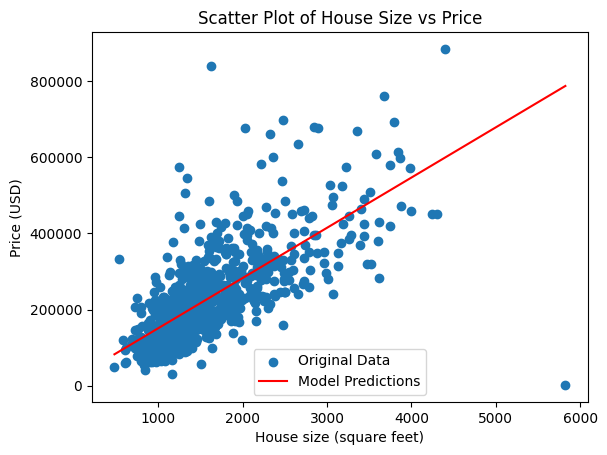

In [103]:
# This line calculates the minimum and maximum values of the "sq__ft" column in the sacramento dataset.
sqft_prediction_grid = sacramento[["sq__ft"]].agg(["min", "max"])

# Uses the linear model to predict prices for the min and max square footage values.
sqft_prediction_grid["predicted"] = lm.predict(sqft_prediction_grid)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label='Original Data')

# Plot the model predictions as a line
plt.plot(sqft_prediction_grid["sq__ft"], sqft_prediction_grid["predicted"], color='red', label='Model Predictions')

# Add labels and legend
plt.xlabel('House size (square feet)')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

# Show the plot
plt.show()

In [104]:
returned_dict = cross_validate(
    estimator = lm,
    X = X_train,
    y = y_train,
    cv = 5,
    scoring = 'neg_root_mean_squared_error'
)

In [105]:
cv_5_df = pd.DataFrame(returned_dict)
cv_5_df

,fit_time,score_time,test_score
0,0.004319,0.002073,-80995.527074
1,0.002232,0.001695,-77223.994147
2,0.002136,0.001606,-72076.390109
3,0.002128,0.001624,-98059.756995
4,0.002191,0.001601,-71480.086802


In [106]:
cv_5_df['test_score'] = cv_5_df['test_score'].abs()
cv_5_df

,fit_time,score_time,test_score
0,0.004319,0.002073,80995.527074
1,0.002232,0.001695,77223.994147
2,0.002136,0.001606,72076.390109
3,0.002128,0.001624,98059.756995
4,0.002191,0.001601,71480.086802


In [107]:
cv_5_metrics = cv_5_df.agg(['mean', 'sem'])
cv_5_metrics

,fit_time,score_time,test_score
mean,0.002601,0.00172,79967.151025
sem,0.000430,0.00009,4848.810291


In [108]:
returned_dict2 = cross_validate(
    estimator = lm,
    X = X_train,
    y = y_train,
    cv =5,
    scoring = 'r2'
)

In [109]:
cv_5_df2 = pd.DataFrame(returned_dict2)
cv_5_df2

,fit_time,score_time,test_score
0,0.003780,0.002109,0.536972
1,0.002774,0.001949,0.568905
2,0.002644,0.001931,0.636889
3,0.002170,0.001729,0.348242
4,0.002083,0.001695,0.558668


In [110]:
cv_5_metrics2 = cv_5_df2.agg(['mean', 'sem'])
cv_5_metrics2

,fit_time,score_time,test_score
mean,0.002690,0.001882,0.529935
sem,0.000303,0.000076,0.048397


In [111]:
#Multivariable LN

In [112]:
mlm = LinearRegression()

In [113]:
mlm.fit(sacramento_train[['sq__ft', 'beds']],
        sacramento_train['price'])

LinearRegression()

In [114]:
mlm.coef_

array([   151.1817206 , -20996.77714783])

In [115]:
mlm.intercept_

56341.60511002323

In [116]:
sacramento_test['predicted'] = mlm.predict(sacramento_test[['sq__ft', 'beds']])

In [117]:
mlm_rmspe = mean_squared_error(
    y_true = sacramento_test['price'],
    y_pred = sacramento_test['predicted']
)**0.5
mlm_rmspe

104438.56729994334

In [118]:
mlm_r2 = r2_score(
    y_true = sacramento_test['price'],
    y_pred = sacramento_test['predicted']
)
mlm_r2

0.31678440996074997

In [119]:
returned_dict_mlm = cross_validate(
    estimator = mlm,
    X = sacramento[['sq_ft','beds']],
    y = y_train,
    cv = 5,
    scoring = 'neg_root_mean_squared_error'
)


KeyError: "['sq_ft'] not in index"

In [ ]:
cv_5_df_mlm = pd.DataFrame(returned_dict_mlm)
cv_5_df_mlm

In [ ]:
cv_5_df_mlm['test_score'] = cv_5_df_mlm['test_score'].abs()
cv_5_df_mlm

In [ ]:
cv_5_metrics_mlm = cv_5_df_mlm.agg(['mean', 'sem'])
cv_5_metrics_mlm

In [ ]:
returned_dict_mlm2 = cross_validate(
    estimator = mlm,
    X = sacramento_train[['sq__ft','beds']],
    y = y_train,
    cv =5,
    scoring = 'r2'
)

In [ ]:
cv_5_df_mlm2 = pd.DataFrame(returned_dict_mlm2)
cv_5_df_mlm2